In [1]:
#Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from scipy import stats

#Estilizar conteúdo
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

def estilo_tabelas(df_eventos, max_altura='300px', casas_decimais=2):
    return (
        df_eventos.style.set_table_styles(
            [
                {'selector': 'thead th', 'props': [('font-size', '12px'), ('text-align', 'center'), ('border-bottom', '2px solid #007BFF')]},
                {'selector': 'td', 'props': [('font-size', '10px'), ('text-align', 'center'), ('max-height', '40px'), ('white-space', 'nowrap'), ('text-overflow', 'ellipsis'), ('overflow', 'hidden'), ('max-width', '100px')]},
                {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#ffffff')]},
                {'selector': 'table', 'props': [('width', '90%'), ('margin-left', 'auto'), ('margin-right', 'auto'), ('border-collapse', 'collapse')]},
                {'selector': 'td, th', 'props': [('border', '1px solid #666')]},
            ]
        ).set_properties(
            **{'border-color': 'darkgray', 'border-style': 'solid', 'border-width': '1px'}
        ).set_table_attributes(
            f'style="height:auto; overflow:auto; max-height:{max_altura}; display:block;"'  
        ).format(
            precision=casas_decimais  
        )
    )

object_columns = ['Protocolo_S2iD', 'Nome_Municipio', 'Sigla_UF', 'regiao',
                  'Setores Censitários', 'Status', 'DH_Descricao', 'DM_Descricao',
                  'DA_Descricao', 'DA_Polui/cont da água', 'DA_Polui/cont do ar',
                  'DA_Polui/cont do solo', 'DA_Dimi/exauri hídrico',
                  "DA_Incêndi parques/APA's/APP's", 'PEPL_Descricao', 'PEPR_Descricao',
                  'Categoria', 'Grupo', 'Subgrupo', 'Tipo', 'Subtipo']

dtype = {col: 'object' for col in object_columns}

df_eventos = pd.read_csv(
    "https://raw.githubusercontent.com/brunagmoura/PrevisorReconhecimento/refs/heads/main/df_eventos_desastres_rec_nrec.csv",
    sep=';',
    dtype = dtype,
    decimal=',',
)

estilo_tabelas(df_eventos.head(5))

,Protocolo_S2iD,Nome_Municipio,Sigla_UF,regiao,Data_Registro,Data_Evento,codigo_ibge,Setores Censitários,Status,DH_Descricao,DH_MORTOS,DH_FERIDOS,DH_ENFERMOS,DH_DESABRIGADOS,DH_DESALOJADOS,DH_DESAPARECIDOS,DH_OUTROS AFETADOS,DH_total_danos_humanos,DM_Descricao,DM_Uni Habita Danificadas,DM_Uni Habita Destruidas,DM_Uni Habita Valor,DM_Inst Saúde Danificadas,DM_Inst Saúde Destruidas,DM_Inst Saúde Valor,DM_Inst Ensino Danificadas,DM_Inst Ensino Destruidas,DM_Inst Ensino Valor,DM_Inst Serviços Danificadas,DM_Inst Serviços Destruidas,DM_Inst Serviços Valor,DM_Inst Comuni Danificadas,DM_Inst Comuni Destruidas,DM_Inst Comuni Valor,DM_Obras de Infra Danificadas,DM_Obras de Infra Destruidas,DM_Obras de Infra Valor,DM_total_danos_materiais,DA_Descricao,DA_Polui/cont da água,DA_Polui/cont do ar,DA_Polui/cont do solo,DA_Dimi/exauri hídrico,DA_Incêndi parques/APA's/APP's,PEPL_Descricao,PEPL_Assis_méd e emergên(R$),PEPL_Abast de água pot(R$),PEPL_sist de esgotos sanit(R$),PEPL_Sis limp e rec lixo (R$),PEPL_Sis cont pragas (R$),PEPL_distrib energia (R$),PEPL_Telecomunicações (R$),PEPL_Tran loc/reg/l_curso (R$),PEPL_Distrib combustíveis(R$),PEPL_Segurança pública (R$),PEPL_Ensino (R$),PEPL_total_publico,PEPR_Descricao,PEPR_Agricultura (R$),PEPR_Pecuária (R$),PEPR_Indústria (R$),PEPR_Comércio (R$),PEPR_Serviços (R$),PEPR_total_privado,PE_PLePR,Ano_Evento,Empenhado,DensidadePop,Area,Município - UF,PIB,DOMICILIO_AREARURAL,PDEFAGUA,PDEFESGOTO,PDEFLIXO,PDEFSAN,QTDE_FAMILIAS_ATUALIZADAS,Categoria,Grupo,Subgrupo,Tipo,Subtipo,COBRADE,Pop
0,SP-A-3550001-12200-20100101,São Luiz do Paraitinga,SP,Sudeste,2010-01-01,2010-01-01,3550001,nan,Reconhecido,nan,0,0,0,93,4030,0,16,4139,nan,49,20,20643486.93,3.00,0,1121928.64,9.00,1,5235666.98,0,0,0.00,3,3,32411.27,25.00,0.00,65321178.46,92354672.28,nan,nan,nan,nan,nan,nan,nan,7978.16,673157.18,623293.69,2493.17,0.00,330993.88,3739.76,58609.55,0.00,0.00,1087024.19,2787289.59,nan,1642902.43,1149353.56,379785.31,0.00,24433.11,3196474.42,5983764.00,2010,nan,nan,nan,São Luiz do Paraitinga - SP,86448.00,nan,nan,nan,nan,nan,nan,Natural,Hidrológico,Enxurradas,nan,nan,12200,10397.00
1,SP-A-3518305-11321-20100101,Guararema,SP,Sudeste,2010-01-01,2010-01-01,3518305,nan,Reconhecido,nan,4,2,0,66,417,0,14430,14919,nan,161,91,18604069.99,0.00,0,0.00,2.00,0,24931.75,0,0,0.00,0,0,37397.62,9000.00,0.00,57771845.31,76438244.67,nan,nan,nan,nan,nan,nan,nan,0.00,179508.58,264276.52,12465.87,0.00,349044.47,74795.24,134631.44,0.00,0.00,77288.42,1092010.54,nan,441291.93,2049389.64,0.00,0.00,112192.89,2602874.46,3694885.00,2010,nan,nan,nan,Guararema - SP,1111405.00,nan,nan,nan,nan,nan,nan,Natural,Geológico,Movimento de massa,Deslizamentos,Deslizamentos de solo e ou rocha,11321,25844.00
2,BA-A-2905909-14110-20100101,Campo Alegre de Lourdes,BA,Nordeste,2010-01-01,2010-01-01,2905909,nan,Reconhecido,nan,0,0,0,0,0,0,0,0,nan,0,0,0.00,0.00,0,0.00,0.00,0,0.00,0,0,0.00,0,0,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,747.95,448771.46,0.00,0.00,0.00,0.00,0.00,249317.48,0.00,0.00,177015.41,875852.29,nan,254303.82,147097.31,0.00,0.00,0.00,401401.13,1277253.42,2010,nan,9.64,2914.59,Campo Alegre de Lourdes - BA,107459.00,nan,nan,nan,nan,nan,nan,Natural,Climatológico,Seca,Estiagem,nan,14110,28090.00
3,SP-A-3513603-12100-20100101,Cunha,SP,Sudeste,2010-01-01,2010-01-01,3513603,nan,Reconhecido,nan,6,0,0,38,492,0,12000,12536,nan,89,9,3340854.17,0.00,0,0.00,0.00,0,0.00,0,0,0.00,0,0,0.00,3.00,400.00,8052097.61,11392951.78,nan,nan,nan,nan,nan,nan,nan,0.00,1246.59,0.00,0.00,0.00,1994539.80,0.00,125656.01,0.00,0.00,0.00,2121442.40,nan,49863.50,1383711.99,0.00,0.00,925466.47,2359041.95,4480484.34,2010,nan,15.54,1407.25,Cunha - SP,112225.00,nan,nan,nan,nan,nan,nan,Natural,Hidrológico,Inundações,nan,nan,12100,21866.00
4,BA-P-2917334-12200-20100101,Iuiu,BA,Nordeste,2010-01-01,2010-01-01,2917334,nan,Reconhecido,nan,0,0,0,0,0,0,0,0,nan,0,0,0.00,0.00,0,0.00,0.00,0,0.00,0,0,0.00,0,0,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00

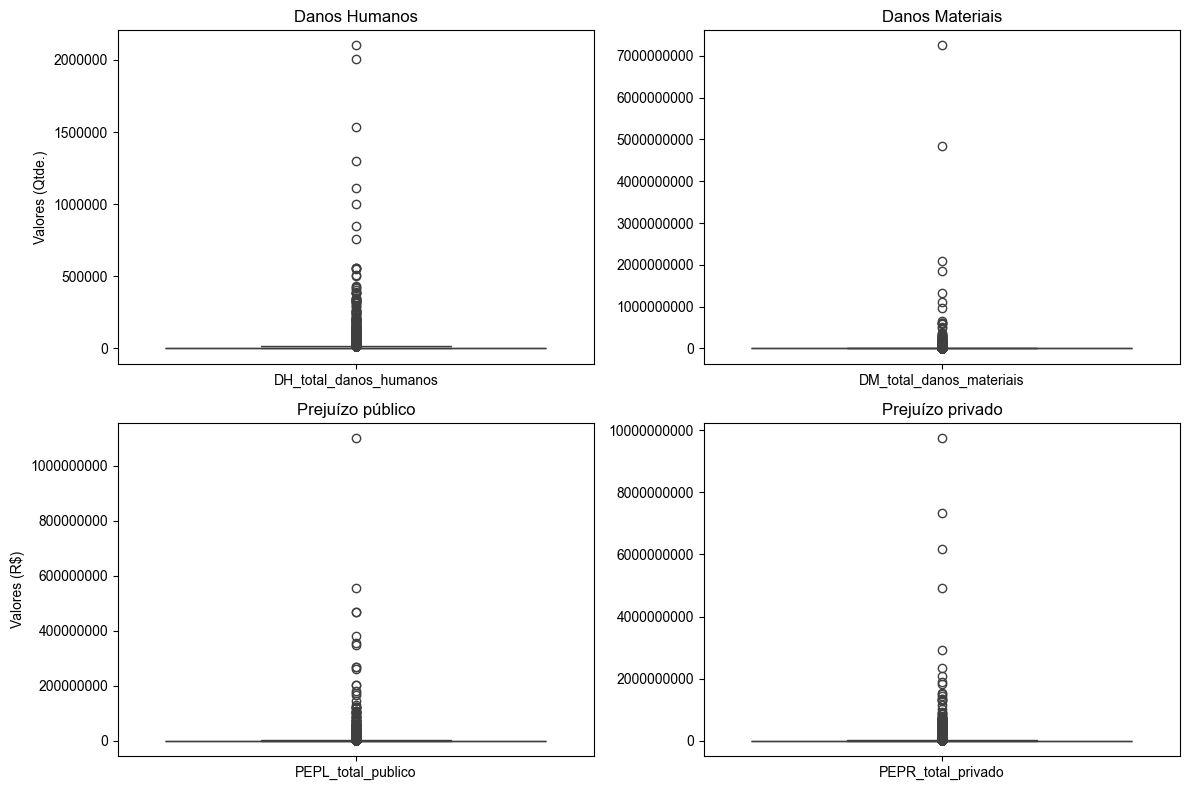

In [2]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Ajustando o estilo
sns.set_style("whitegrid")

# Criando os boxplots com Seaborn
sns.boxplot(data=df_eventos[['DH_total_danos_humanos']], ax=axes[0, 0], color='#1f77b4')
axes[0, 0].set_title('Danos Humanos')
axes[0, 0].set_ylabel('Valores (Qtde.)')

sns.boxplot(data=df_eventos[['DM_total_danos_materiais']], ax=axes[0, 1], color='#1f78b4')
axes[0, 1].set_title('Danos Materiais')

sns.boxplot(data=df_eventos[['PEPL_total_publico']], ax=axes[1, 0], color='#4a85b6')
axes[1, 0].set_title('Prejuízo público')
axes[1, 0].set_ylabel('Valores (R$)')

sns.boxplot(data=df_eventos[['PEPR_total_privado']], ax=axes[1, 1], color='#87c1ea')
axes[1, 1].set_title('Prejuízo privado')

# Removendo notação científica em todos os subplots
for ax in axes.flat:
    ax.ticklabel_format(style='plain', axis='y')

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [3]:
df_eventos.columns

Index(['Protocolo_S2iD', 'Nome_Municipio', 'Sigla_UF', 'regiao',
       'Data_Registro', 'Data_Evento', 'codigo_ibge', 'Setores Censitários',
       'Status', 'DH_Descricao', 'DH_MORTOS', 'DH_FERIDOS', 'DH_ENFERMOS',
       'DH_DESABRIGADOS', 'DH_DESALOJADOS', 'DH_DESAPARECIDOS',
       'DH_OUTROS AFETADOS', 'DH_total_danos_humanos', 'DM_Descricao',
       'DM_Uni Habita Danificadas', 'DM_Uni Habita Destruidas',
       'DM_Uni Habita Valor', 'DM_Inst Saúde Danificadas',
       'DM_Inst Saúde Destruidas', 'DM_Inst Saúde Valor',
       'DM_Inst Ensino Danificadas', 'DM_Inst Ensino Destruidas',
       'DM_Inst Ensino Valor', 'DM_Inst Serviços Danificadas',
       'DM_Inst Serviços Destruidas', 'DM_Inst Serviços Valor',
       'DM_Inst Comuni Danificadas', 'DM_Inst Comuni Destruidas',
       'DM_Inst Comuni Valor', 'DM_Obras de Infra Danificadas',
       'DM_Obras de Infra Destruidas', 'DM_Obras de Infra Valor',
       'DM_total_danos_materiais', 'DA_Descricao', 'DA_Polui/cont da água',
  

In [4]:
colunas = ['DH_total_danos_humanos', 'DM_total_danos_materiais', 'PEPL_total_publico', 'PEPR_total_privado',
           'DH_MORTOS', 'DH_FERIDOS', 'DH_ENFERMOS',
       'DH_DESABRIGADOS', 'DH_DESALOJADOS', 'DH_DESAPARECIDOS',
       'DH_OUTROS AFETADOS', 'DM_Uni Habita Danificadas', 'DM_Uni Habita Destruidas',
       'DM_Uni Habita Valor', 'DM_Inst Saúde Danificadas',
       'DM_Inst Saúde Destruidas', 'DM_Inst Saúde Valor',
       'DM_Inst Ensino Danificadas', 'DM_Inst Ensino Destruidas',
       'DM_Inst Ensino Valor', 'DM_Inst Serviços Danificadas',
       'DM_Inst Serviços Destruidas', 'DM_Inst Serviços Valor',
       'DM_Inst Comuni Danificadas', 'DM_Inst Comuni Destruidas',
       'DM_Inst Comuni Valor', 'DM_Obras de Infra Danificadas',
       'DM_Obras de Infra Destruidas', 'DM_Obras de Infra Valor','PEPL_Assis_méd e emergên(R$)',
       'PEPL_Abast de água pot(R$)', 'PEPL_sist de esgotos sanit(R$)',
       'PEPL_Sis limp e rec lixo (R$)', 'PEPL_Sis cont pragas (R$)',
       'PEPL_distrib energia (R$)', 'PEPL_Telecomunicações (R$)',
       'PEPL_Tran loc/reg/l_curso (R$)', 'PEPL_Distrib combustíveis(R$)',
       'PEPL_Segurança pública (R$)', 'PEPL_Ensino (R$)']

# Calculando o z-score para cada coluna
df_zscores = df_eventos[colunas].apply(lambda col: stats.zscore(col))

# Identificando outliers (z-score > 3 ou z-score < -3)
outliers = (df_zscores > 3) | (df_zscores < -3)

# Contando o número de outliers em cada coluna
contagem_outliers = outliers.sum()

# Exibindo o resultado
contagem_outliers_df = pd.DataFrame(contagem_outliers, columns=['Número de Outliers'])

estilo_tabelas(contagem_outliers_df.sort_values(by = 'Número de Outliers', ascending = False))

,Número de Outliers
DM_Inst Ensino Danificadas,350
DH_DESALOJADOS,231
DM_Inst Serviços Destruidas,183
DM_Inst Ensino Destruidas,172
DH_ENFERMOS,157
DM_Uni Habita Danificadas,155
PEPL_distrib energia (R$),150
DH_OUTROS AFETADOS,143
DH_total_danos_humanos,140
PEPL_Ensino (R$),138
